In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_new = df.drop(columns=['id','diagnosis', 'Unnamed: 32'])
df_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[[1.000e+00 1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01
  3.001e-01 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00
  1.534e+02 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03
  2.538e+01 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01
  2.654e-01 4.601e-01 1.189e-01]
 [1.000e+00 2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02
  8.690e-02 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00
  7.408e+01 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03
  2.499e+01 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01
  1.860e-01 2.750e-01 8.902e-02]
 [1.000e+00 1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01
  1.974e-01 1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00
  9.403e+01 6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03
  2.357e+01 2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01
  2.430e-01 3.613e-01 8.758e-02]
 [1.000e+00 1.142e+01 2.038e+01 7.758

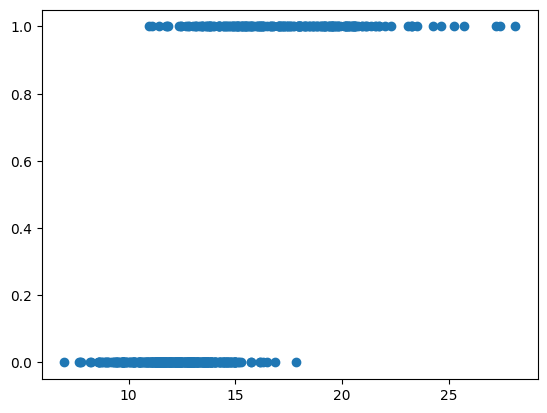

In [5]:
num_samples = df.shape[0]
num_features = 30
preX = df_new.to_numpy().reshape((num_samples,num_features))
X = np.hstack((np.ones((num_samples,1)), preX))
print(X[:5])
y = df['diagnosis'].replace(['M','B'],[1,0]).to_numpy().reshape((num_samples,1))
print(y[:5])
plt.scatter(X[:,1],y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

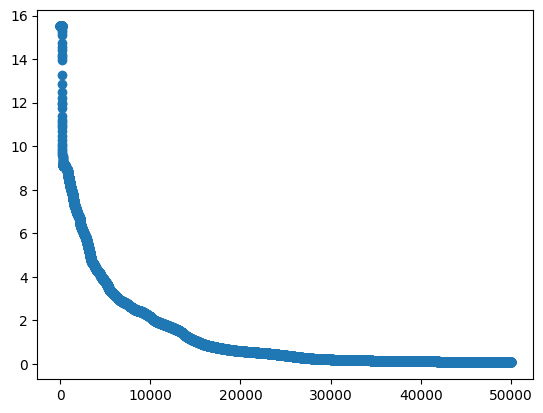

[[ 0.96209169]
 [ 0.73154404]
 [ 0.34861842]
 [-0.59818423]
 [-0.0319428 ]
 [ 0.99686479]
 [ 0.99950166]
 [ 1.00225819]
 [ 1.00124853]
 [ 0.99376722]
 [ 0.99753206]
 [ 0.98444655]
 [ 0.9254108 ]
 [ 0.9169713 ]
 [ 0.33054611]
 [ 0.99966412]
 [ 0.99936148]
 [ 0.99905563]
 [ 0.99976886]
 [ 0.99900669]
 [ 0.99978028]
 [ 0.70298812]
 [ 0.19961359]
 [-0.65525733]
 [ 0.11743389]
 [ 0.99614239]
 [ 1.00289144]
 [ 1.00685932]
 [ 1.00188083]
 [ 0.9918915 ]
 [ 0.99749852]]


In [7]:
# gradient descent
n_iterations = 50000
learning_rate = 0.00001
gradients = []
iterations = []
params = np.ones((num_features+1,1))
# print(params)

def linear_predict(X,params):
    return X.dot(params)

def sigmoid(X):
    return 1/(1 + np.exp(-X))

def predict(X,params):
    return sigmoid(linear_predict(X,params))
    
def prob_to_binary(X):
    return np.vectorize(lambda x: (int)(x>=0.5))(X)

for i in range(n_iterations):

    # IMP remember formula
    y_pred = predict(X_train,params) 
    iter_grads = (2/num_samples) * X_train.T.dot(y_pred - y_train)
    params = params - learning_rate * iter_grads

    # for plotting
    iterations.append(i)
    gradients.append(iter_grads[2,0])

plt.scatter(iterations, gradients)
plt.show()
print(params)

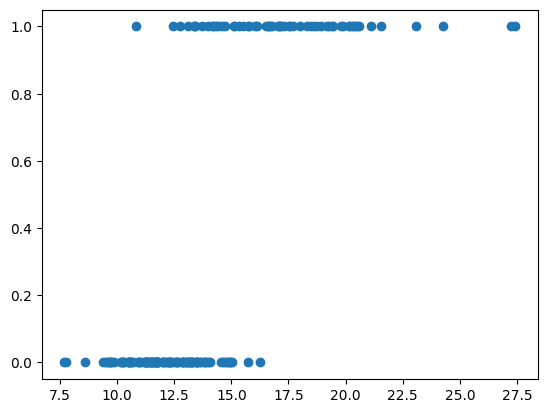

In [8]:
y_pred = prob_to_binary(predict(X_test,params))
plt.scatter(X_test[:,1],y_pred)
plt.show()

In [9]:
from sklearn import metrics
rep = metrics.classification_report(y_test,y_pred)
print(rep)
print(metrics.accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       111
           1       0.85      0.87      0.86        60

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171

90.05847953216374
